In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\vidisha\Downloads\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

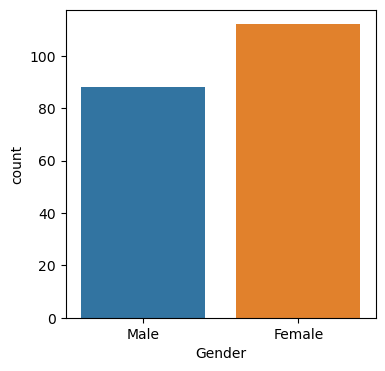

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='Gender', data=df)
plt.show()

C:\Users\vidisha\AppData\Local\Temp\ipykernel_14440\669709771.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


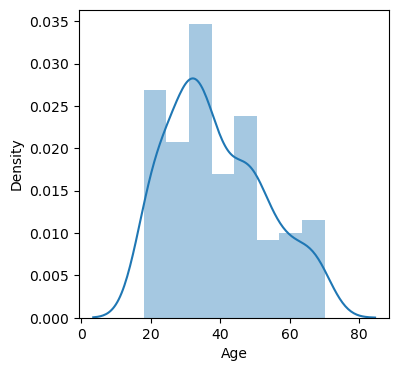

In [14]:
plt.figure(figsize=(4,4))
sns.distplot(df['Age'])
plt.show()

In [49]:
from sklearn.cluster import KMeans
n=[]
for i in range(1,10):
    k= KMeans(n_clusters=i)
    k.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    n.append(k.inertia_)

C:\Users\vidisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vidisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\vidisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vidisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:

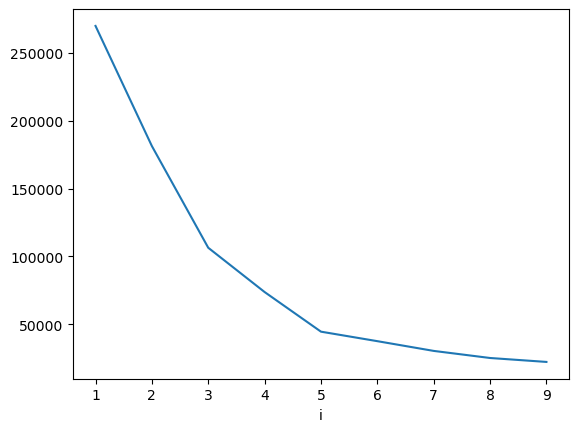

In [26]:
plt.xlabel('i')
plt.plot(range(1,10),n)

In [45]:
k=KMeans(n_clusters=5)
y_pred=k.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
#y_pred

C:\Users\vidisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\vidisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [46]:
cluster_centers = k.cluster_centers_

In [47]:
labels = k.labels_
df['cluster'] = labels

In [48]:
df['cluster']

0      2
1      4
2      2
3      4
4      2
      ..
195    3
196    1
197    3
198    1
199    3
Name: cluster, Length: 200, dtype: int32

In [39]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'Age',
                    y = 'Annual Income (k$)',
                    z = 'Spending Score (1-100)',
                    color = 'cluster')
                   
fig.show()

In [41]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [42]:
df.groupby('cluster').agg({'Age':['mean', 'median'],'Annual Income (k$)':['mean', 'median'], 'Spending Score (1-100)':['mean', 'median']}).round(1)

Age        Annual Income (k$)        Spending Score (1-100)       
         mean median               mean median                   mean median
cluster                                                                     
0        42.7   46.0               55.3   54.0                   49.5   50.0
1        41.1   42.0               88.2   85.0                   17.1   16.0
2        32.7   32.0               86.5   79.0                   82.1   83.0
3        45.2   46.0               26.3   25.0                   20.9   17.0
4        25.3   23.5               25.7   24.5                   79.4   77.0